**IMPORT LIBRARIES**

In [1]:
import pandas as pd

**LOAD DATASETS**

In [ ]:
data=pd.read_csv('FastagFraudDetection.csv')

In [ ]:
data.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [ ]:
data.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [ ]:
data.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [ ]:
data.dropna(subset=['FastagID'],inplace=True)

In [ ]:
data.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,4451.000000,4451.000000,4451.000000,4451.000000
mean,2466.227140,180.927881,158.684565,67.884745
std,1428.941144,103.004437,99.857565,16.632295
min,1.000000,0.000000,0.000000,10.000000
25%,1254.500000,110.000000,100.000000,55.000000
50%,2405.000000,140.000000,120.000000,67.000000
75%,3702.500000,300.000000,180.000000,82.000000
max,5000.000000,350.000000,350.000000,118.000000


**DATA PREPROCESSING**

In [ ]:
pd.concat([data['Vehicle_Type'],data['TollBoothID'],data['Lane_Type'],data['Vehicle_Dimensions']]).unique()

array(['Bus ', 'Car', 'Truck', 'Van', 'Sedan', 'SUV', 'Motorcycle',
       'A-101', 'B-102', 'C-103', 'D-106', 'Express', 'Regular', 'Large',
       'Small', 'Medium'], dtype=object)

In [ ]:
veh_type={'Bus ':1, 'Car':2, 'Truck':3, 'Van':4, 'Sedan':5, 'SUV':6, 'Motorcycle':7}
toll_id={'A-101':11, 'B-102':12, 'C-103':13, 'D-106':14}
lane={'Express':21, 'Regular':22}
veh_dim={'Large':31,'Small':32, 'Medium':33}

In [ ]:
data['Vehicle_Type'].replace(veh_type,inplace=True)
data['TollBoothID'].replace(toll_id,inplace=True)
data['Lane_Type'].replace(lane,inplace=True)
data['Vehicle_Dimensions'].replace(veh_dim,inplace=True)

**DATA VISUALIZATION**

In [ ]:
import matplotlib.pyplot as plt

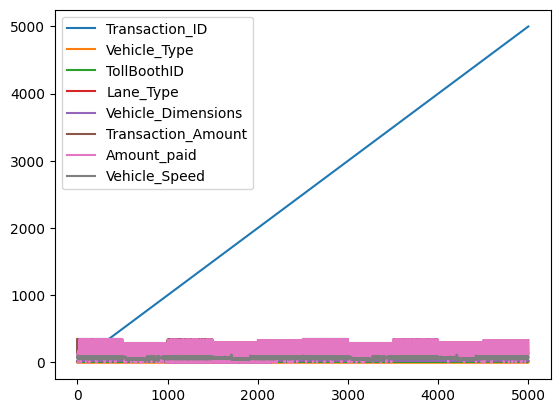

In [ ]:
data.plot()
plt.show()

In [ ]:
import seaborn as sb

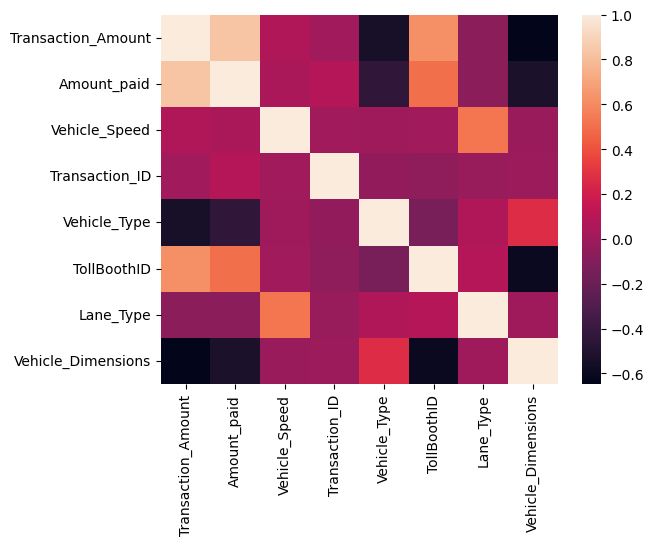

In [ ]:
correlation_matrix = data[['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed','Transaction_ID','Vehicle_Type','TollBoothID','Lane_Type','Vehicle_Dimensions']].corr()
sb.heatmap(correlation_matrix)
plt.show()

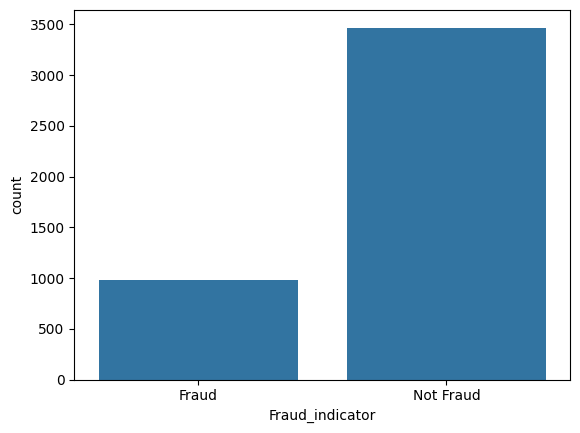

In [ ]:
sb.countplot(x='Fraud_indicator',data=data)
plt.show()

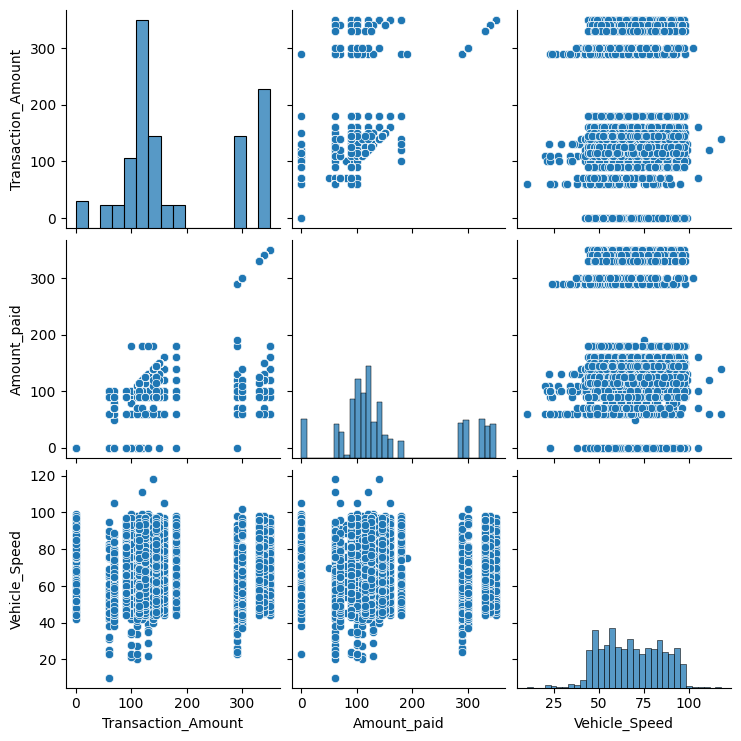

In [ ]:
sb.pairplot(data, vars=['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed'])
plt.show()

**SEPERATE X AND Y**

In [ ]:
x=data.drop(['FastagID','Geographical_Location','Vehicle_Plate_Number','Fraud_indicator','Timestamp'],axis=1)
y=data.Fraud_indicator
x.shape

(4451, 8)

**DATASET SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**MODEL SELECTION**

In [ ]:
from sklearn.tree import DecisionTreeClassifier as dt

In [ ]:
model1= dt()

**TRAINING**

In [ ]:
model1.fit(x_train,y_train)

DecisionTreeClassifier()

***PREDICTION***

In [ ]:
pred1=model1.predict(x_test)
pred1

array(['Not Fraud', 'Not Fraud', 'Not Fraud', ..., 'Fraud', 'Not Fraud',
       'Not Fraud'], dtype=object)

**MODEL EVALUATION**

In [ ]:
from sklearn.metrics import (accuracy_score,classification_report,confusion_matrix)

In [ ]:
print('decision tree  accuracy is',accuracy_score(y_test,pred1))

decision tree  accuracy is 0.999251497005988


In [ ]:
print('classification report\n',classification_report(y_test,pred1))

classification report
               precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00       275
   Not Fraud       1.00      1.00      1.00      1061

    accuracy                           1.00      1336
   macro avg       1.00      1.00      1.00      1336
weighted avg       1.00      1.00      1.00      1336



In [ ]:
confusion_matrix(y_test,pred1)

array([[ 274,    1],
       [   0, 1061]])

DECISION TREE VISUALIZATION

In [ ]:
from sklearn.tree import plot_tree

[Text(0.4811320754716981, 0.9583333333333334, 'x[6] <= 105.0\ngini = 0.351\nsamples = 3115\nvalue = [708, 2407]'),
 Text(0.32075471698113206, 0.875, 'x[5] <= 105.0\ngini = 0.5\nsamples = 1019\nvalue = [501, 518]'),
 Text(0.2830188679245283, 0.7916666666666666, 'x[6] <= 95.0\ngini = 0.232\nsamples = 598\nvalue = [80, 518]'),
 Text(0.20754716981132076, 0.7083333333333334, 'x[5] <= 95.0\ngini = 0.293\nsamples = 437\nvalue = [78, 359]'),
 Text(0.16981132075471697, 0.625, 'x[6] <= 30.0\ngini = 0.184\nsamples = 400\nvalue = [41, 359]'),
 Text(0.07547169811320754, 0.5416666666666666, 'x[5] <= 30.0\ngini = 0.327\nsamples = 141\nvalue = [29, 112]'),
 Text(0.03773584905660377, 0.4583333333333333, 'gini = 0.0\nsamples = 112\nvalue = [0, 112]'),
 Text(0.11320754716981132, 0.4583333333333333, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(0.2641509433962264, 0.5416666666666666, 'x[6] <= 75.0\ngini = 0.088\nsamples = 259\nvalue = [12, 247]'),
 Text(0.18867924528301888, 0.4583333333333333, 'x[0]

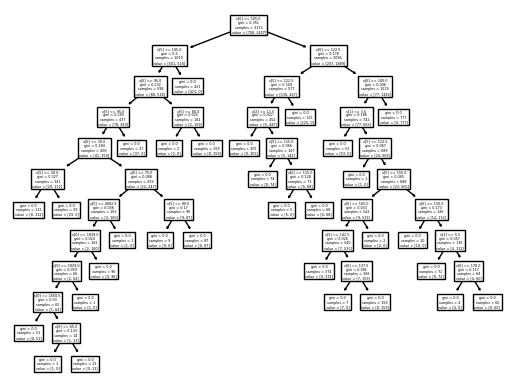

In [ ]:
plot_tree(model1)

**KNN CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as kn

In [ ]:
model2= kn(n_neighbors=5)

In [ ]:
model2.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
pred2=model2.predict(x_test)

In [ ]:
print('KNN accuracy is',accuracy_score(y_test,pred2))

KNN accuracy is 0.9011976047904192


In [ ]:
print('classification report\n',classification_report(y_test,pred2))

classification report
               precision    recall  f1-score   support

       Fraud       0.93      0.56      0.70       275
   Not Fraud       0.90      0.99      0.94      1061

    accuracy                           0.90      1336
   macro avg       0.92      0.77      0.82      1336
weighted avg       0.90      0.90      0.89      1336



In [ ]:
confusion_matrix(y_test,pred2)

array([[ 154,  121],
       [  11, 1050]])

**SVM MODEL**

In [ ]:
from sklearn.svm import SVC

In [ ]:
model3=SVC()

In [ ]:
model3.fit(x_train,y_train)

SVC()

In [ ]:
pred3=model3.predict(x_test)

In [ ]:
pred3

array(['Not Fraud', 'Not Fraud', 'Not Fraud', ..., 'Not Fraud',
       'Not Fraud', 'Not Fraud'], dtype=object)

In [ ]:
print('SVM accuracy is',accuracy_score(y_test,pred3))

SVM accuracy is 0.8488023952095808


In [ ]:
print('classification report\n',classification_report(y_test,pred3))

classification report
               precision    recall  f1-score   support

       Fraud       1.00      0.27      0.42       275
   Not Fraud       0.84      1.00      0.91      1061

    accuracy                           0.85      1336
   macro avg       0.92      0.63      0.67      1336
weighted avg       0.87      0.85      0.81      1336



In [ ]:
confusion_matrix(y_test,pred3)

array([[  73,  202],
       [   0, 1061]])

**ADABOOST**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier as ab

In [ ]:
model4=ab(n_estimators=5)

In [ ]:
model4.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=5)

In [ ]:
pred4=model4.predict(x_test)
pred4

array(['Not Fraud', 'Not Fraud', 'Not Fraud', ..., 'Fraud', 'Not Fraud',
       'Not Fraud'], dtype=object)

In [ ]:
print('AdaBoost accuracy is',accuracy_score(y_test,pred4))

AdaBoost accuracy is 0.9461077844311377


In [ ]:
print('classification report\n',classification_report(y_test,pred4))

classification report
               precision    recall  f1-score   support

       Fraud       1.00      0.74      0.85       275
   Not Fraud       0.94      1.00      0.97      1061

    accuracy                           0.95      1336
   macro avg       0.97      0.87      0.91      1336
weighted avg       0.95      0.95      0.94      1336



In [ ]:
confusion_matrix(y_test,pred4)

array([[ 203,   72],
       [   0, 1061]])